# Performing EDA & Predictive analysis on Indian weather data


### This notebook includes:
 - Data preprocessing
 - EDA to understand the data
 - Understanding Statewise data 
 - Comparing various models to predict temparature.

### Importing Data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/indian-weather-repository-daily-snapshot/IndianWeatherRepository.csv


In [2]:
weather_data = pd.read_csv("/kaggle/input/indian-weather-repository-daily-snapshot/IndianWeatherRepository.csv")

In [3]:
weather_data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,15868.000000,15868.000000,1.586800e+04,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,...,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000,15868.000000
mean,23.101816,80.237048,1.694477e+09,24.765314,76.577659,5.900649,9.499943,186.721830,1005.344845,29.687027,...,15.856201,534.627426,25.708401,8.442267,4.893849,38.170582,46.212635,2.114885,3.787056,46.595727
std,5.795698,5.758379,7.197810e+05,3.794186,6.829476,3.452184,5.550549,97.487885,3.065070,0.090421,...,8.631677,459.515519,21.540349,8.908646,12.246430,49.061351,56.859891,1.189849,3.271611,35.741011
min,8.080000,68.970000,1.693286e+09,-4.200000,24.500000,2.200000,3.600000,1.000000,997.000000,29.440000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.693870e+09,23.400000,74.000000,3.100000,5.000000,94.000000,1003.000000,29.620000,...,9.700000,263.700000,10.500000,3.000000,0.800000,8.700000,11.500000,1.000000,1.000000,14.000000
50%,23.970000,78.670000,1.694473e+09,25.000000,77.100000,5.100000,8.300000,213.000000,1005.000000,29.680000,...,14.800000,407.200000,21.500000,5.700000,2.100000,21.750000,27.800000,2.000000,2.000000,41.000000
75%,26.770000,83.900000,1.695077e+09,27.000000,80.600000,7.600000,12.200000,267.000000,1007.000000,29.740000,...,20.800000,674.300000,35.100000,10.900000,4.900000,49.300000,59.425000,3.000000,6.000000,79.000000
max,34.570000,95.800000,1.695680e+09,38.300000,100.900000,25.700000,41.400000,360.000000,1021.000000,30.140000,...,71.600000,11642.500000,171.700000,141.200000,541.700000,899.500000,1043.700000,6.000000,10.000000,100.000000


# Data preprocessing 


In [4]:
# Creating separate dataset for data containing numeric data for analysis

weather_df= weather_data.select_dtypes(include = 'number')
cols = weather_df.columns.values
cols

array(['latitude', 'longitude', 'last_updated_epoch',
       'temperature_celsius', 'temperature_fahrenheit', 'wind_mph',
       'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index',
       'moon_illumination'], dtype=object)

In [5]:
#Removing redundant columns [such as temperature in celsius & fahrenheit]

weather_df.drop(['temperature_fahrenheit','wind_mph','pressure_in','precip_mm','feels_like_fahrenheit','visibility_km','gust_mph'], axis=1,inplace=True)
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Understanding the data using histogram 

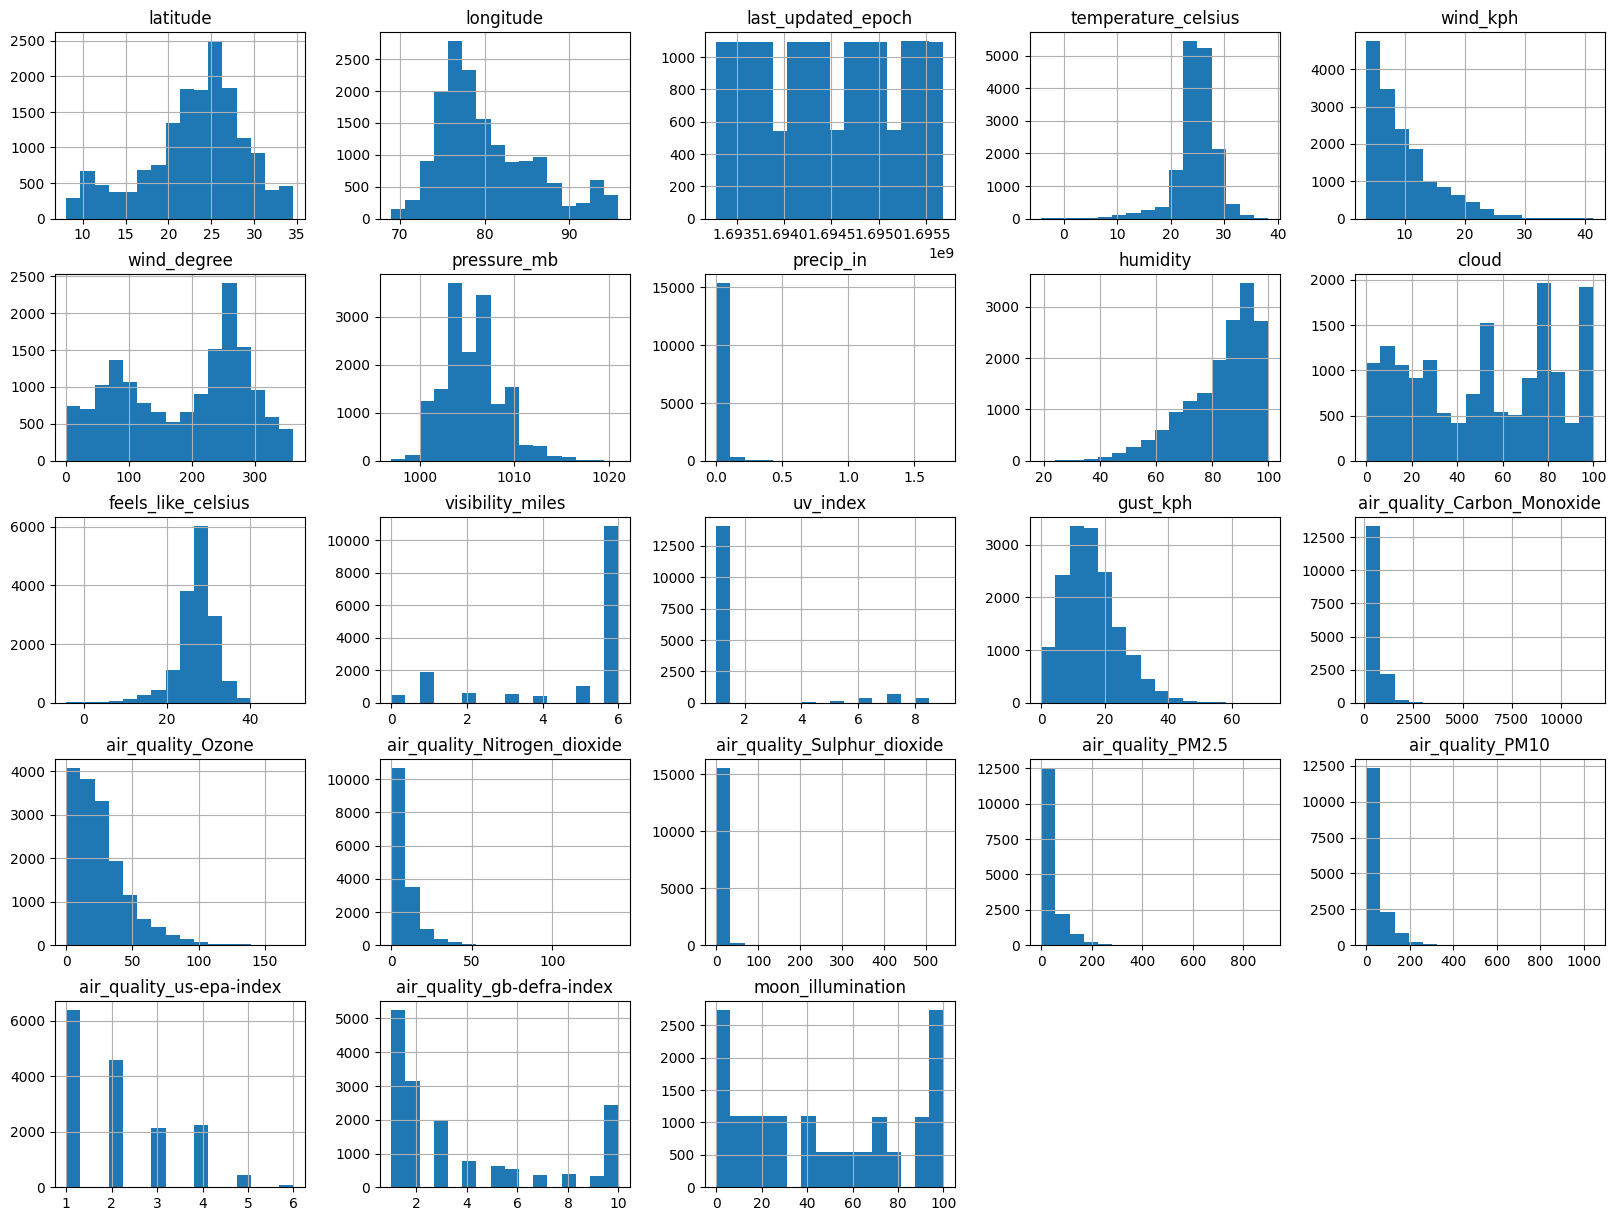

In [6]:
weather_df.hist(bins=16, figsize=(20,15));

# Determining correlation between various fields

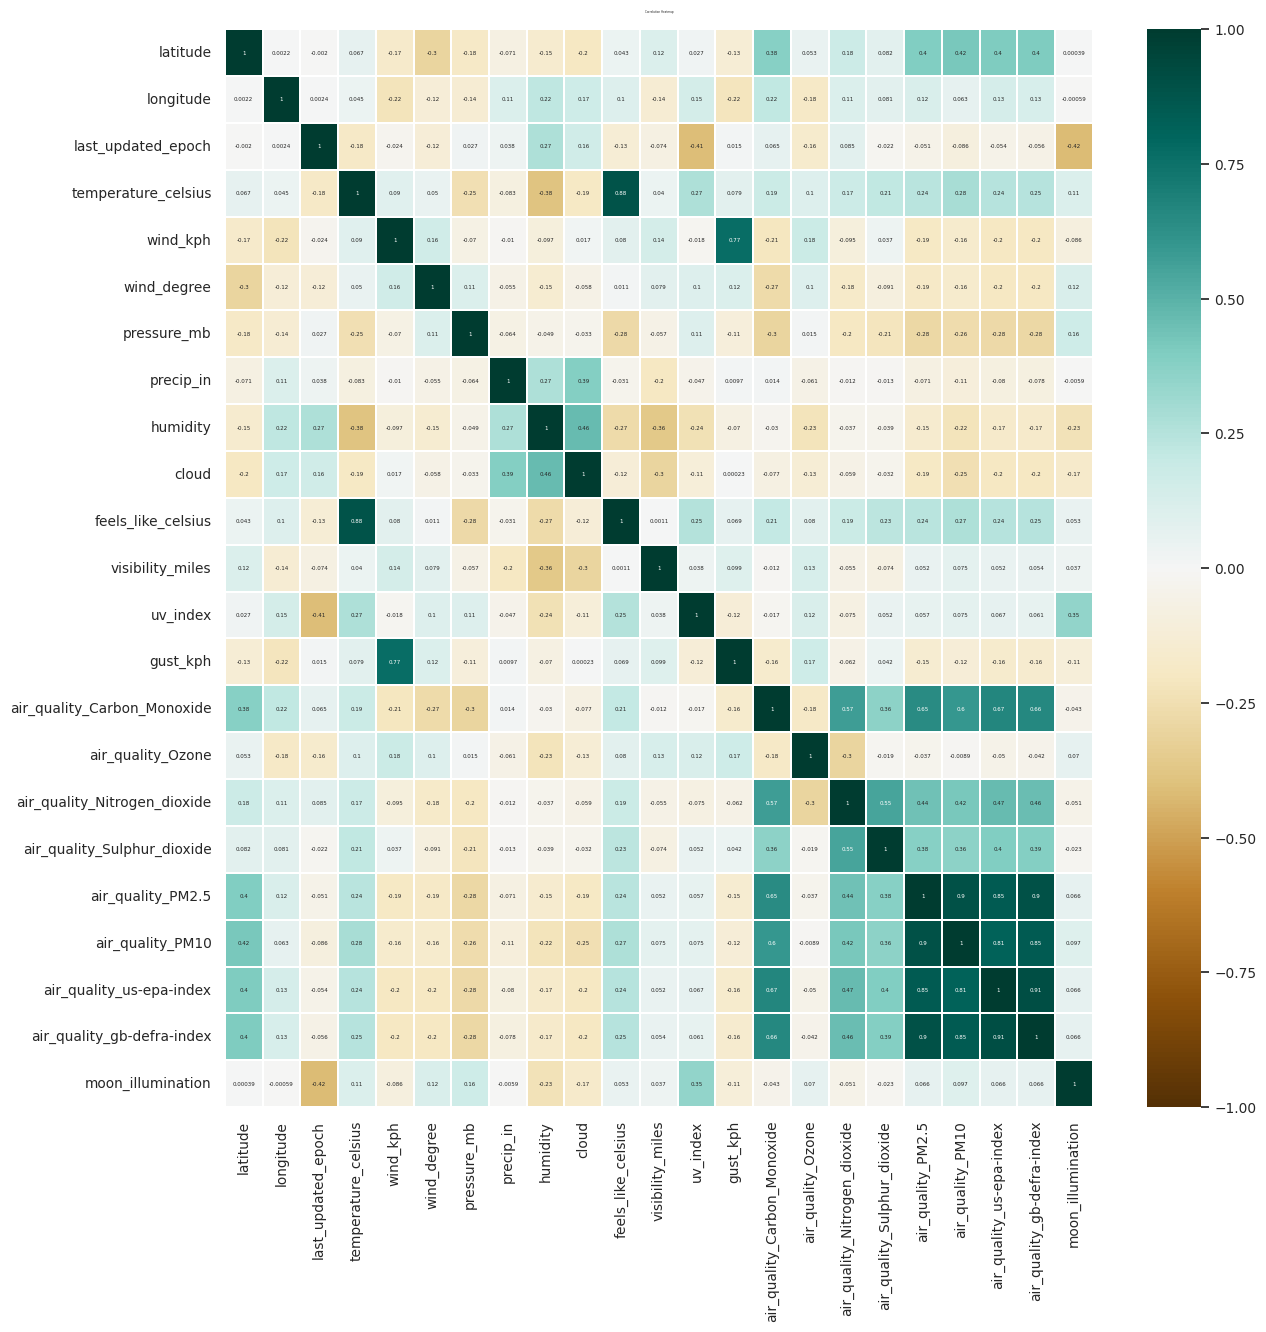

In [7]:
#Creating a correlation matrix
sns.set(font_scale=0.9)

corr_matrix = weather_df.corr(method="kendall")

plt.figure(figsize=(14, 14))
heatmap= sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,cmap='BrBG',annot_kws={"fontsize":4},linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':2}, pad=12);


In [8]:
sorted_corr_mat = corr_matrix.abs().unstack().sort_values()
sorted_corr_mat = sorted_corr_mat.to_frame(name="Correlation")

# Removing highly/ least correlated data (correlation>0.90 && <0.05)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']>0.95].index)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']<0.05].index)
print("Fields with max correlation are:\n")

sorted_corr_mat[sorted_corr_mat['Correlation']>0.80]

Fields with max correlation are:



,,Correlation
air_quality_us-epa-index,air_quality_PM10,0.813988
air_quality_PM10,air_quality_us-epa-index,0.813988
air_quality_us-epa-index,air_quality_PM2.5,0.846265
air_quality_PM2.5,air_quality_us-epa-index,0.846265
air_quality_gb-defra-index,air_quality_PM10,0.850298
air_quality_PM10,air_quality_gb-defra-index,0.850298
feels_like_celsius,temperature_celsius,0.882876
temperature_celsius,feels_like_celsius,0.882876
air_quality_PM2.5,air_quality_gb-defra-index,0.897770
air_quality_gb-defra-index,air_quality_PM2.5,0.897770


# Understanding State-wise trend of air quality indices

In [9]:
import plotly.express as px

In [10]:
# Average PM2.5 exposure

fig1=px.bar(weather_data.groupby('region')['air_quality_PM2.5'].mean().reset_index(),
           x='region', y='air_quality_PM2.5', 
           title='Average PM2.5 by State')
fig1.show()

In [11]:
# Average UV exposure

fig2=px.bar(weather_data.groupby('region')['uv_index'].mean().reset_index(), x='region', y='uv_index', title='Average uv_index exposure by State')
fig2.show()

In [12]:
# UV index scatterplot
fig3 = px.scatter(weather_data, x='uv_index', y='temperature_celsius', color='region',
                 title='Correlation Between UV Index and Temperature by Region',
                 labels={'uv_index': 'UV Index', 'temperature_celsius': 'Temperature (Celsius)'})

fig3.update_layout(xaxis_title='UV Index', yaxis_title='Temperature (Celsius)')

fig3.show()

In [13]:
# Temperature 
fig4=px.bar(weather_data.groupby('region')['temperature_celsius'].mean().reset_index(), x='region', y='temperature_celsius', title='Average temperature exposure by State')
fig4.show()

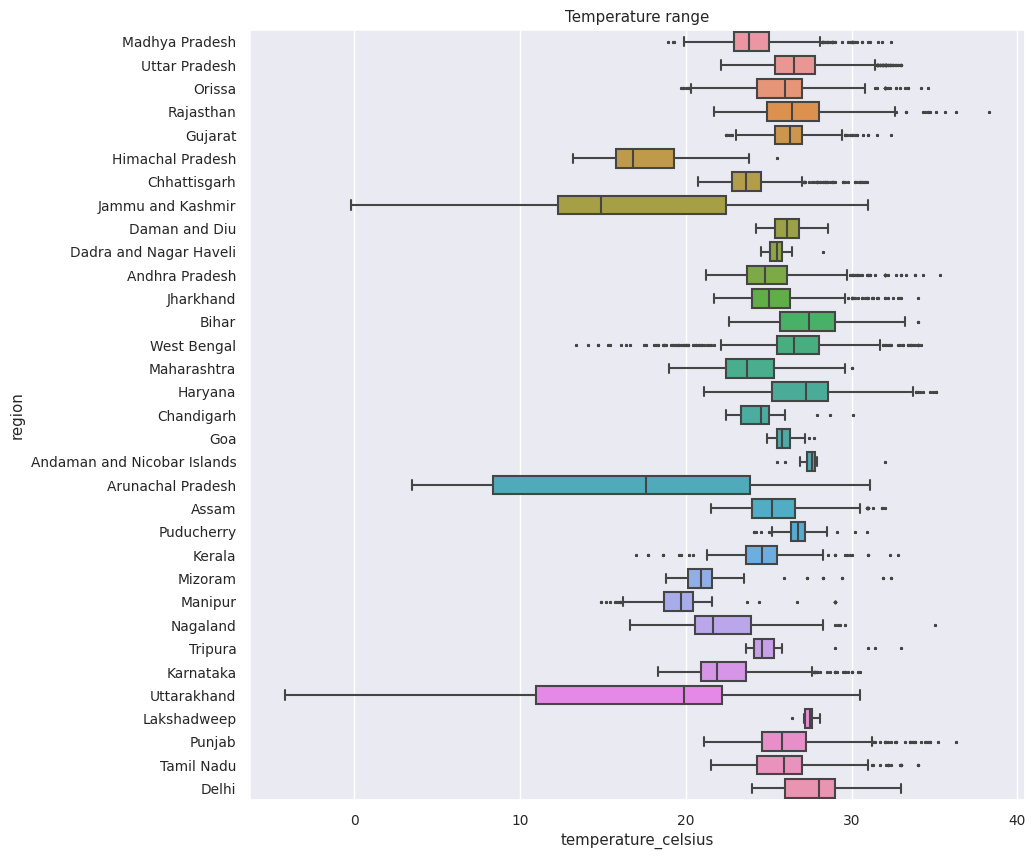

In [14]:
# Temperature range
plt.figure(figsize=(10, 10))
temp_range=sns.boxplot(data=weather_data, y='region', x='temperature_celsius', 
                       flierprops={'marker': '*', 'markersize': 2, 'markerfacecolor': 'blue'})
temp_range.set_title("Temperature range")

plt.show()

# Ploting Temperature vs various air quality metrices (Scaled)

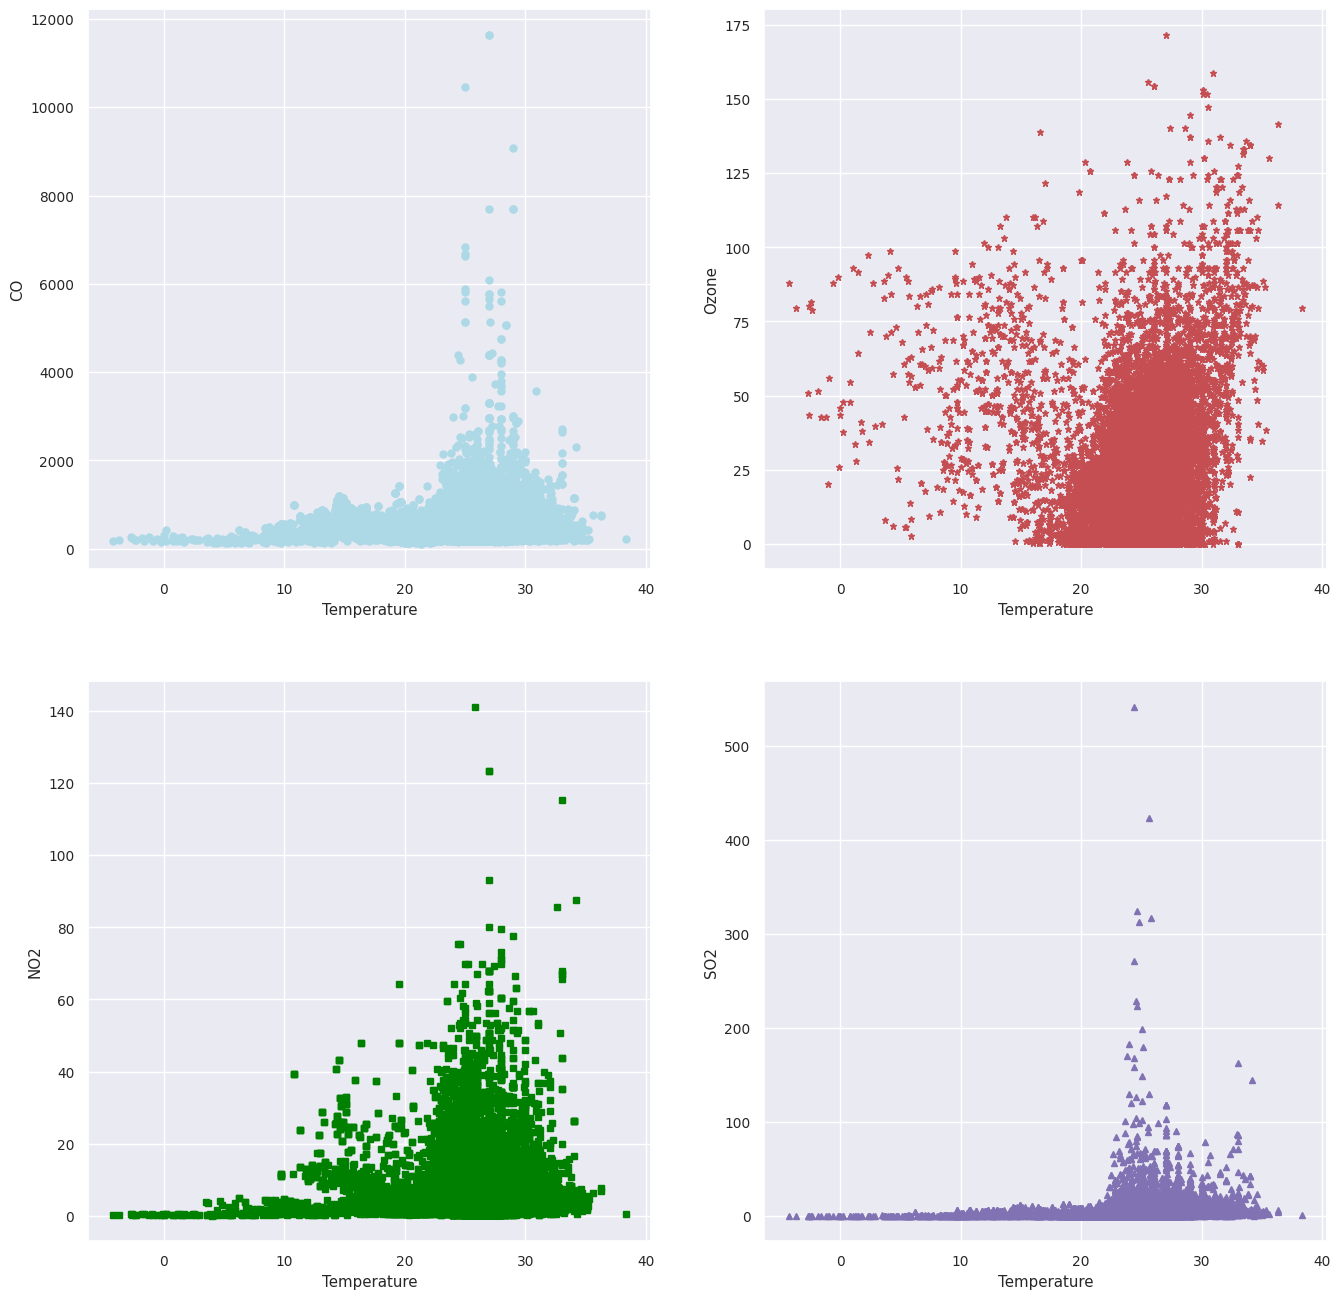

In [15]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

temp_weather=weather_data


# Scatter Plots for Air Quality Metrics vs Temperature
air_quality_metrics = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 
                       'air_quality_Sulphur_dioxide']

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot( "temperature_celsius","air_quality_Carbon_Monoxide", data=temp_weather,color="lightblue",marker='o',ms="5",ls = '',label="CO")
plt.xlabel("Temperature")
plt.ylabel("CO")

plt.subplot(2, 2, 2)
plt.plot( "temperature_celsius","air_quality_Ozone", data=temp_weather,color="r",marker='*',ms="5",ls = '',label="Ozone")
plt.xlabel("Temperature")
plt.ylabel("Ozone")

plt.subplot(2, 2, 3)
plt.plot( "temperature_celsius","air_quality_Nitrogen_dioxide", data=temp_weather,color="green",marker='s',ms="5",ls = '',label="NO2")
plt.xlabel("Temperature")
plt.ylabel("NO2")

plt.subplot(2, 2, 4)
plt.plot( "temperature_celsius","air_quality_Sulphur_dioxide", data=temp_weather,color="m",marker='^',ms="5",ls = '',label="SO2")
plt.xlabel("Temperature")
plt.ylabel("SO2")

plt.show()

In [16]:
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Comparing various models that can be used to predict temparature


As temperature depend on various factors like latitude, longitude, wind, rain, humidity etc, we will be considering these fields only.

In [17]:
temperature_data = weather_df['temperature_celsius']
temperature_factors = weather_df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(temperature_factors, temperature_data, test_size = 0.3, random_state = 0)

In [19]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (11107, 8)
X_test: (4761, 8)
Y_train: (11107,)
Y_test: (4761,)


# Model 1 : MultiLinear Regression

In [20]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 53.21


# Model 2 : LASSO Regression

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred=lasso.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 51.20


# Model 3: Decision Tree Based Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 89.27


# Model 4: Random Forest 

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 93.69


# Model 5: SGD

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_booster = GradientBoostingRegressor(
    n_estimators=500,learning_rate=0.1,random_state=100,
    max_features=5,loss='squared_error',)
gradient_booster.fit(x_train, y_train)

y_pred=gradient_booster.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 91.64
